In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 4.1. Loading data with linear interpolation.

In [2]:
# Open df with FL characteristics (y)

df = pd.read_csv("FL_augm_inter_w_smooth.csv", index_col = 'idx').iloc[:,1:] #"FL_augm_inter_w.csv"
df

,I,x,y,left_bound,right_bound,down_bound,up_bound,I_x_left,I_x_right,I_y_down,I_y_up,Cu,Ni,Pb,Al,Co,Cr,NO3
idx,,,,,,,,,,,,,,,,,,
1,1094.013,440.0,350.0,410.997078,483.985513,319.837088,377.141444,32092.946811,55681.420983,7526.354879,6554.217700,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,202.294,450.0,350.0,414.577059,498.744699,323.395276,380.964878,6988.960165,10871.964268,1184.090837,1342.087958,0.0,0.0,0.0,0.0,4.5,4.5,22.5
100,177.025,454.0,355.0,417.197886,502.827048,327.105424,383.454723,6662.354552,9932.300708,1123.217310,1146.207041,0.0,0.0,1.5,3.0,6.0,4.5,37.5
1000,191.846,455.0,355.0,418.799921,504.925887,327.328667,383.479384,6944.652646,10680.836195,1170.757224,1225.503524,0.0,4.5,0.0,6.0,6.0,4.5,52.5
1001,631.573,441.0,350.0,411.644120,485.927998,321.419781,377.998183,18644.724966,32540.515302,4147.462148,3894.747976,0.0,4.5,1.5,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,246.346,456.0,355.0,418.914238,505.600813,327.041189,383.432359,9085.038092,13701.728784,1521.052042,1555.695514,0.0,4.5,0.0,6.0,3.0,4.5,46.5
996,399.123,456.0,360.0,422.002086,505.372822,328.436916,390.751460,13991.087131,22430.024973,2782.018995,2715.377589,0.0,4.5,0.0,6.0,4.5,0.0,36.0
997,256.685,454.0,355.0,417.657632,504.495323,326.466136,383.546410,9514.945313,14770.350457,1663.446831,1668.043184,0.0,4.5,0.0,6.0,4.5,3.0,45.0


In [3]:
idx_norm = 1

df_norm = pd.DataFrame()

df_norm['I'] = df['I'] / df['I'].loc[idx_norm]
df_norm['x'] = df['x'] / df['x'].loc[idx_norm]
df_norm['y'] = df['y'] / df['y'].loc[idx_norm]

df_norm['x_hw_mean'] = (df['right_bound'] + df['left_bound']) / (df['right_bound'].loc[idx_norm] + df['left_bound'].loc[idx_norm])
df_norm['x_hw_res'] = (df['right_bound'] - df['left_bound']) / (df['right_bound'].loc[idx_norm] - df['left_bound'].loc[idx_norm])
df_norm['y_hw_mean'] = (df['up_bound'] + df['down_bound']) / (df['up_bound'].loc[idx_norm] + df['down_bound'].loc[idx_norm])
df_norm['y_hw_res'] = (df['up_bound'] - df['down_bound']) / (df['up_bound'].loc[idx_norm] - df['down_bound'].loc[idx_norm])

df_norm['x_I_mean'] = (df['I_x_right'] + df['I_x_left']) / (df['I_x_right'].loc[idx_norm] + df['I_x_left'].loc[idx_norm])
df_norm['x_I_res'] = (df['I_x_right'] - df['I_x_left']) / (df['I_x_right'].loc[idx_norm] - df['I_x_left'].loc[idx_norm])
df_norm['y_I_mean'] = (df['I_y_up'] + df['I_y_down']) / (df['I_y_up'].loc[idx_norm] + df['I_y_down'].loc[idx_norm])
df_norm['y_I_res'] = (df['I_y_up'] - df['I_y_down']) / (df['I_y_up'].loc[idx_norm] - df['I_y_down'].loc[idx_norm])

df_norm['Cu'] = df['Cu']
df_norm['Ni'] = df['Ni']
df_norm['Pb'] = df['Pb']
df_norm['Al'] = df['Al']
df_norm['Co'] = df['Co']
df_norm['Cr'] = df['Cr']
df_norm['NO3'] = df['NO3']

df_norm

,I,x,y,x_hw_mean,x_hw_res,y_hw_mean,y_hw_res,x_I_mean,x_I_res,y_I_mean,y_I_res,Cu,Ni,Pb,Al,Co,Cr,NO3
idx,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.184910,1.022727,1.000000,1.020491,1.153164,1.010591,1.004629,0.203487,0.164614,0.179409,-0.162526,0.0,0.0,0.0,0.0,4.5,4.5,22.5
100,0.161813,1.031818,1.014286,1.027981,1.173188,1.019486,0.983334,0.189060,0.138625,0.161174,-0.023649,0.0,0.0,1.5,3.0,6.0,4.5,37.5
1000,0.175360,1.034091,1.014286,1.032116,1.179995,1.019842,0.979868,0.200805,0.158390,0.170182,-0.056315,0.0,4.5,0.0,6.0,6.0,4.5,52.5
1001,0.577299,1.002273,1.000000,1.002893,1.017749,1.003500,0.987332,0.583146,0.589092,0.571156,0.259957,0.0,4.5,1.5,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.225176,1.036364,1.014286,1.032998,1.187675,1.019362,0.984064,0.259606,0.195718,0.218510,-0.035636,0.0,4.5,0.0,6.0,3.0,4.5,46.5
996,0.364825,1.036364,1.028571,1.036193,1.142246,1.031866,1.087431,0.414940,0.357757,0.390424,0.068551,0.0,4.5,0.0,6.0,4.5,0.0,36.0
997,0.234627,1.031818,1.014286,1.030359,1.189746,1.018701,0.996090,0.276679,0.222795,0.236602,-0.004728,0.0,4.5,0.0,6.0,4.5,3.0,45.0


# Building models

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2_score


def rmse(y_true, y_pred, kwargs={}):
    return (mse(y_true, y_pred, **kwargs))**0.5

def scatter_prediction(model, 
                       x, 
                       y_true, 
                       title = ""):
    """Evaluates MSE and R^2 of model. 
    Draws scatter plot of (y_true, y_predicted).
    Returns  (mse, r2)
    """
    y_pred = model.predict(x)
    model_rmse = rmse(y_true, y_pred)
    model_mae = mae(y_true, y_pred)
    model_r2 = r2_score(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(5,5))
    plt.plot(y_true, y_pred, 'o', markersize=2, alpha = 0.2) 
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], markersize=2, alpha = 0.5, color='r') 
    ax.set_title(f"RMSE={round(model_rmse, 5)} | MAE={round(model_mae, 5)} | R2={round(model_r2, 5)} | {title}")
    ax.set_xlabel("y_true")
    ax.set_ylabel("y_pred")
    plt.show()
    
    return model_rmse, model_mae, model_r2

In [5]:
l_PR_ION = ['Cu', 'Ni', 'Pb', 'Al', 'Co', 'Cr', 'NO3']

x = df_norm.drop(l_PR_ION, axis=1).to_numpy()
#y = df_norm[l_PR_ION[0]].to_numpy()

x.shape #, y.shape

(7813, 11)

## 5. Scaling y-data
Train / Validation / Test = 0.7 / 0.2 / 0.1

TRAIN_TEST_RATIO = (Test) / (Train+Validation+Test)

VALIDATION_TRAIN_RATIO = Validation / (Train+Validation)

In [6]:
TEST_TRAIN_RATIO = 0.1
n_splits = 10
VALIDATION_TRAIN_RATIO = 2 / 9 #7 / 9
RS = None

N_ITER_NO_CHANGE = 20

## 6. Model - MLP
Ordinary one-hidden-layer with *HIDDEN_LAYER_SIZES*=64 neurons perceptron.
We use MLPRegressor from scikit-learn library.

In [9]:
mlp_HIDDEN_LAYER_SIZES = [64]
mlp_ACTIVATION = 'tanh'
mlp_SOLVER = 'adam'
mlp_MAX_ITER = 10000
TOL = 1e-3

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, make_scorer

from tqdm import tqdm

n_splits = 10
scoring = {'rmse': make_scorer(root_mean_squared_error), 
           'mae': make_scorer(mean_absolute_error),
           'r2': make_scorer(r2_score)}

l_PR_ION = ['Cu', 'Ni', 'Pb', 'Al', 'Co', 'Cr', 'NO3']

mlp_mean_rmse, mlp_std_rmse = [], []
mlp_mean_mae, mlp_std_mae = [], []
mlp_mean_r2, mlp_std_r2 = [], []
l_y_scaler_multiplier = []


for PR_ION in tqdm(l_PR_ION):
    model = MLPRegressor(hidden_layer_sizes=mlp_HIDDEN_LAYER_SIZES,
                         activation=mlp_ACTIVATION,
                         solver=mlp_SOLVER,
                         early_stopping=True,
                         validation_fraction=VALIDATION_TRAIN_RATIO,
                         n_iter_no_change=N_ITER_NO_CHANGE,
                         learning_rate_init = 0.001,
                         learning_rate='constant',
                         max_iter=mlp_MAX_ITER,
                         random_state=RS,
                         tol=TOL)
    
    # Choosing certain ion 
    y = df_norm[[PR_ION]].to_numpy()
    # Scaling y before train_test split in cv only because we aprior know the distribution of ions.
    scaler_y = MinMaxScaler()
    y_all_scaled = scaler_y.fit_transform(y)
    y_scaler_multiplier = scaler_y.data_max_[0] - scaler_y.data_min_[0]
    l_y_scaler_multiplier.append(y_scaler_multiplier)
    
    cv_rf_kf = cross_validate(model, x, y_all_scaled.ravel(), cv=KFold(shuffle=True, n_splits=n_splits), scoring=scoring)
    
    mlp_mean_mae.append(np.mean(cv_rf_kf['test_mae']))
    mlp_std_mae.append(np.std(cv_rf_kf['test_mae']))
    
    mlp_mean_rmse.append(np.mean(cv_rf_kf['test_rmse']))
    mlp_std_rmse.append(np.std(cv_rf_kf['test_rmse']))
    
    mlp_mean_r2.append(np.mean(cv_rf_kf['test_r2']))
    mlp_std_r2.append(np.std(cv_rf_kf['test_r2']))

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [04:44<00:00, 40.58s/it]


Text(0.5, 1.0, 'CV sklMLP | ')

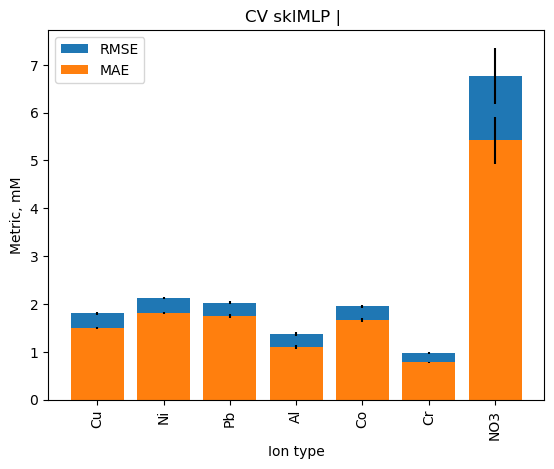

In [26]:
plt.bar(l_PR_ION, np.array(mlp_mean_rmse) * np.array(l_y_scaler_multiplier), 
             yerr=np.array(mlp_std_rmse) * np.array(l_y_scaler_multiplier)) # , fmt='o-'
plt.bar(l_PR_ION, np.array(mlp_mean_mae) * np.array(l_y_scaler_multiplier), 
             yerr=np.array(mlp_std_mae) * np.array(l_y_scaler_multiplier)) # , fmt='o-'

'''
plt.errorbar(l_PR_ION, np.array(mlp_mean_rmse) * np.array(l_y_scaler_multiplier), 
             yerr=np.array(mlp_std_rmse) * np.array(l_y_scaler_multiplier)) # , fmt='o-'
plt.errorbar(l_PR_ION, np.array(mlp_mean_mae) * np.array(l_y_scaler_multiplier), 
             yerr=np.array(mlp_std_mae) * np.array(l_y_scaler_multiplier)) # , fmt='o-'
'''
#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Ion type') #'number of params'
plt.ylabel('Metric, mM')
plt.legend(['RMSE', 'MAE'])
plt.title(f'CV sklMLP | ')

Text(0.5, 1.0, 'CV MLP | ')

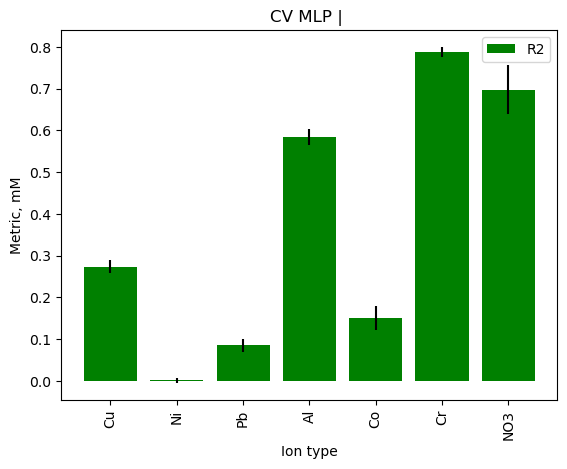

In [36]:
plt.bar(l_PR_ION, np.array(mlp_mean_r2), 
             yerr=np.array(mlp_std_r2), color='g') # , fmt='o-'

#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Ion type') #'number of params'
plt.ylabel('Metric, mM')
plt.legend(['R2'])
plt.title(f'CV MLP | ')

# 7. Catboost

In [12]:
import catboost

In [13]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, make_scorer

from tqdm import tqdm

n_splits = 10
scoring = {'rmse': make_scorer(root_mean_squared_error), 
           'mae': make_scorer(mean_absolute_error),
           'r2': make_scorer(r2_score)}

l_PR_ION = ['Cu', 'Ni', 'Pb', 'Al', 'Co', 'Cr', 'NO3']

cb_mean_rmse, cb_std_rmse = [], []
cb_mean_mae, cb_std_mae = [], []
cb_mean_r2, cb_std_r2 = [], []
l_y_scaler_multiplier = []

for PR_ION in tqdm(l_PR_ION):
    model = catboost.CatBoostRegressor(verbose=0, random_seed=RS)
    
    # Choosing certain ion 
    y = df_norm[[PR_ION]].to_numpy()
    # Scaling y before train_test split in cv only because we aprior know the distribution of ions.
    scaler_y = MinMaxScaler()
    y_all_scaled = scaler_y.fit_transform(y)
    y_scaler_multiplier = scaler_y.data_max_[0] - scaler_y.data_min_[0]
    l_y_scaler_multiplier.append(y_scaler_multiplier)
    
    cv_rf_kf = cross_validate(model, x, y_all_scaled.ravel(), cv=KFold(shuffle=True, n_splits=n_splits), scoring=scoring)
    
    cb_mean_mae.append(np.mean(cv_rf_kf['test_mae']))
    cb_std_mae.append(np.std(cv_rf_kf['test_mae']))
    
    cb_mean_rmse.append(np.mean(cv_rf_kf['test_rmse']))
    cb_std_rmse.append(np.std(cv_rf_kf['test_rmse']))
    
    cb_mean_r2.append(np.mean(cv_rf_kf['test_r2']))
    cb_std_r2.append(np.std(cv_rf_kf['test_r2']))

100%|██████████| 7/7 [05:22<00:00, 46.10s/it]


Text(0.5, 1.0, 'CV CatBoost | ')

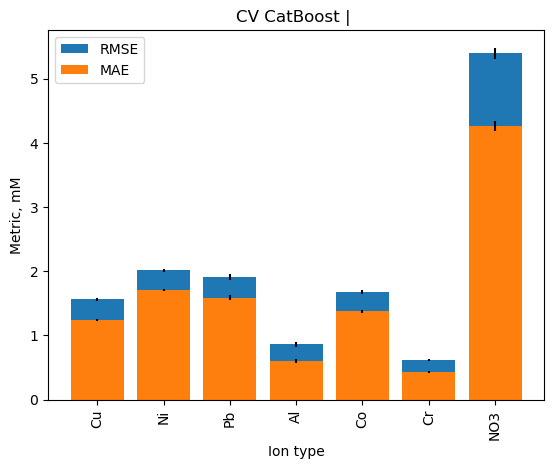

In [27]:
plt.bar(l_PR_ION, np.array(cb_mean_rmse) * np.array(l_y_scaler_multiplier), 
             yerr=np.array(cb_std_rmse) * np.array(l_y_scaler_multiplier)) # , fmt='o-'
plt.bar(l_PR_ION, np.array(cb_mean_mae) * np.array(l_y_scaler_multiplier), 
             yerr=np.array(cb_std_mae) * np.array(l_y_scaler_multiplier)) # , fmt='o-'

#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Ion type') #'number of params'
plt.ylabel('Metric, mM')
plt.legend(['RMSE', 'MAE'])
plt.title(f'CV CatBoost | ')

Text(0.5, 1.0, 'CV CatBoost | ')

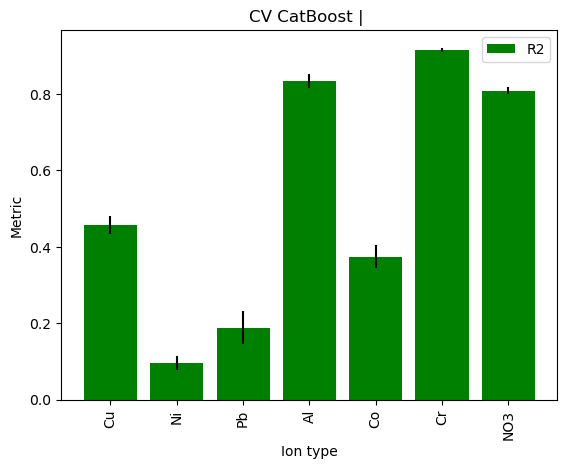

In [37]:
plt.bar(l_PR_ION, np.array(cb_mean_r2), 
             yerr=np.array(cb_std_r2), color='g') # , fmt='o-'

#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Ion type') #'number of params'
plt.ylabel('Metric')
plt.legend(['R2'])
plt.title(f'CV CatBoost | ')

## 8. Model - KAN


In [7]:
import torch
from kan import KAN

from tools import kfold_experiment_es

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 1.50e+00 | vl_ls: 1.54e+00 | e_stop: 20/20 | tst_ls: 2.31e+00 | reg: 4.78e+01 :  14%|▌   | 27/200 [01:51<11:55,  4.13s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 1.54e+00 | vl_ls: 1.61e+00 | e_stop: 20/20 | tst_ls: 1.23e+00 | reg: 6.61e+01 :  41%|█▋  | 82/200 [05:01<07:14,  3.68s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 1.51e+00 | vl_ls: 1.59e+00 | e_stop: 20/20 | tst_ls: 2.19e+00 | reg: 5.98e+01 :  19%|▊   | 38/200 [02:18<09:50,  3.64s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 1.59e+00 | vl_ls: 1.67e+00 | e_stop: 20/20 | tst_ls: 1.33e+00 | reg: 5.83e+01 :  36%|█▍  | 73/200 [04:54<08:31,  4.03s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 1.54e+00 | vl_ls: 1.62e+00 | e_stop: 20/20 | tst_ls: 1.34e+00 | reg: 6.62e+01 :  38%|█▌  | 75/200 [05:29<09:09,  4.39s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 1.54e+00 | vl_ls: 1.67e+00 | e_stop: 20/20 | tst_ls: 1.43e+00 | reg: 6.47e+01 :  42%|█▋  | 84/200 [06:51<09:28,  4.90s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 1.62e+00 | vl_ls: 1.62e+00 | e_stop: 20/20 | tst_ls: 1.21e+00 | reg: 5.78e+01 :  18%|▋   | 37/200 [03:01<13:20,  4.91s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 1.50e+00 | vl_ls: 1.58e+00 | e_stop: 20/20 | tst_ls: 2.06e+00 | reg: 5.23e+01 :  18%|▋   | 36/200 [02:42<12:18,  4.50s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 1.45e+00 | vl_ls: 1.57e+00 | e_stop: 20/20 | tst_ls: 2.27e+00 | reg: 7.43e+01 :  25%|█   | 50/200 [03:48<11:25,  4.57s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 1.50e+00 | vl_ls: 1.61e+00 | e_stop: 20/20 | tst_ls: 1.98e+00 | reg: 5.75e+01 :  13%|▌   | 26/200 [01:55<12:51,  4.43s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 1.81e+00 | vl_ls: 1.96e+00 | e_stop: 20/20 | tst_ls: 2.77e+00 | reg: 6.24e+01 :  25%|█   | 50/200 [03:35<10:47,  4.32s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 1.90e+00 | vl_ls: 1.97e+00 | e_stop: 20/20 | tst_ls: 1.97e+00 | reg: 7.90e+01 :  34%|█▎  | 67/200 [04:45<09:26,  4.26s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 1.89e+00 | vl_ls: 1.97e+00 | e_stop: 20/20 | tst_ls: 2.22e+00 | reg: 6.81e+01 :  20%|▊   | 41/200 [03:12<12:26,  4.70s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 1.88e+00 | vl_ls: 1.98e+00 | e_stop: 20/20 | tst_ls: 2.30e+00 | reg: 7.97e+01 :  20%|▊   | 41/200 [03:03<11:52,  4.48s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 1.92e+00 | vl_ls: 2.00e+00 | e_stop: 20/20 | tst_ls: 1.84e+00 | reg: 7.67e+01 :  34%|█▎  | 67/200 [04:46<09:27,  4.27s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 1.86e+00 | vl_ls: 2.06e+00 | e_stop: 20/20 | tst_ls: 2.56e+00 | reg: 6.13e+01 :  16%|▌   | 31/200 [02:18<12:34,  4.47s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 1.95e+00 | vl_ls: 2.09e+00 | e_stop: 20/20 | tst_ls: 1.27e+00 | reg: 8.19e+01 :  30%|█▏  | 61/200 [04:26<10:08,  4.37s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 1.85e+00 | vl_ls: 2.77e+00 | e_stop: 20/20 | tst_ls: 2.68e+00 | reg: 5.67e+01 :  14%|▌   | 29/200 [02:06<12:26,  4.37s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 1.95e+00 | vl_ls: 2.02e+00 | e_stop: 20/20 | tst_ls: 1.57e+00 | reg: 7.30e+01 :  26%|█   | 53/200 [03:11<08:50,  3.61s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 1.93e+00 | vl_ls: 2.03e+00 | e_stop: 20/20 | tst_ls: 2.70e+00 | reg: 6.98e+01 :  16%|▌   | 31/200 [01:51<10:09,  3.61s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 1.83e+00 | vl_ls: 1.93e+00 | e_stop: 20/20 | tst_ls: 1.94e+00 | reg: 5.25e+01 :  18%|▋   | 37/200 [02:26<10:43,  3.95s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 1.84e+00 | vl_ls: 1.95e+00 | e_stop: 20/20 | tst_ls: 1.86e+00 | reg: 6.04e+01 :  18%|▋   | 35/200 [02:17<10:50,  3.94s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 1.83e+00 | vl_ls: 1.98e+00 | e_stop: 20/20 | tst_ls: 2.04e+00 | reg: 5.66e+01 :  16%|▋   | 32/200 [02:09<11:17,  4.04s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 1.82e+00 | vl_ls: 1.91e+00 | e_stop: 20/20 | tst_ls: 2.20e+00 | reg: 5.18e+01 :  16%|▋   | 32/200 [02:08<11:12,  4.00s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 1.84e+00 | vl_ls: 1.92e+00 | e_stop: 20/20 | tst_ls: 1.93e+00 | reg: 5.20e+01 :  14%|▌   | 29/200 [02:12<13:01,  4.57s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 1.86e+00 | vl_ls: 1.92e+00 | e_stop: 20/20 | tst_ls: 1.62e+00 | reg: 5.79e+01 :  30%|█▏  | 60/200 [04:09<09:42,  4.16s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 1.83e+00 | vl_ls: 1.87e+00 | e_stop: 20/20 | tst_ls: 2.00e+00 | reg: 6.59e+01 :  34%|█▎  | 67/200 [06:11<12:17,  5.55s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 1.83e+00 | vl_ls: 1.89e+00 | e_stop: 20/20 | tst_ls: 2.16e+00 | reg: 4.27e+01 :  14%|▌   | 27/200 [02:11<14:01,  4.86s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 1.83e+00 | vl_ls: 1.90e+00 | e_stop: 20/20 | tst_ls: 2.06e+00 | reg: 5.63e+01 :  16%|▋   | 33/200 [02:19<11:47,  4.23s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 1.84e+00 | vl_ls: 1.95e+00 | e_stop: 20/20 | tst_ls: 1.99e+00 | reg: 5.15e+01 :  24%|▉   | 49/200 [03:19<10:14,  4.07s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 8.29e-01 | vl_ls: 8.49e-01 | e_stop: 20/20 | tst_ls: 7.17e-01 | reg: 4.76e+01 :  21%|▊   | 42/200 [04:26<16:43,  6.35s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 8.13e-01 | vl_ls: 8.95e-01 | e_stop: 20/20 | tst_ls: 6.97e-01 | reg: 5.69e+01 :  22%|▉   | 45/200 [04:53<16:51,  6.52s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 8.15e-01 | vl_ls: 8.49e-01 | e_stop: 20/20 | tst_ls: 8.97e-01 | reg: 5.01e+01 :  22%|▊   | 43/200 [03:43<13:37,  5.20s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 8.20e-01 | vl_ls: 8.24e-01 | e_stop: 20/20 | tst_ls: 8.46e-01 | reg: 5.91e+01 :  25%|█   | 50/200 [03:18<09:56,  3.97s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 8.15e-01 | vl_ls: 8.30e-01 | e_stop: 20/20 | tst_ls: 8.25e-01 | reg: 6.05e+01 :  34%|█▍  | 69/200 [03:54<07:25,  3.40s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 8.16e-01 | vl_ls: 8.00e-01 | e_stop: 20/20 | tst_ls: 8.64e-01 | reg: 5.38e+01 :  32%|█▎  | 63/200 [03:50<08:20,  3.66s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 8.08e-01 | vl_ls: 7.95e-01 | e_stop: 20/20 | tst_ls: 8.87e-01 | reg: 6.22e+01 :  32%|█▎  | 65/200 [03:52<08:01,  3.57s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 8.04e-01 | vl_ls: 8.13e-01 | e_stop: 20/20 | tst_ls: 9.78e-01 | reg: 4.92e+01 :  34%|█▍  | 69/200 [04:02<07:39,  3.51s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 7.97e-01 | vl_ls: 8.35e-01 | e_stop: 20/20 | tst_ls: 9.28e-01 | reg: 5.37e+01 :  34%|█▎  | 68/200 [04:02<07:50,  3.57s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 8.05e-01 | vl_ls: 8.43e-01 | e_stop: 20/20 | tst_ls: 8.84e-01 | reg: 5.16e+01 :  29%|█▏  | 58/200 [03:24<08:19,  3.52s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 1.63e+00 | vl_ls: 1.72e+00 | e_stop: 20/20 | tst_ls: 1.94e+00 | reg: 5.90e+01 :  46%|█▊  | 92/200 [05:28<06:25,  3.57s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 1.64e+00 | vl_ls: 1.71e+00 | e_stop: 20/20 | tst_ls: 1.76e+00 | reg: 6.31e+01 :  28%|█   | 56/200 [03:24<08:44,  3.64s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 1.64e+00 | vl_ls: 1.73e+00 | e_stop: 20/20 | tst_ls: 1.72e+00 | reg: 6.87e+01 :  37%|█▍  | 74/200 [04:27<07:35,  3.62s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 1.64e+00 | vl_ls: 1.71e+00 | e_stop: 20/20 | tst_ls: 1.69e+00 | reg: 5.78e+01 :  26%|█   | 52/200 [03:07<08:54,  3.61s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 1.65e+00 | vl_ls: 1.74e+00 | e_stop: 20/20 | tst_ls: 1.65e+00 | reg: 5.87e+01 :  26%|█   | 52/200 [03:08<08:56,  3.62s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 1.67e+00 | vl_ls: 1.87e+00 | e_stop: 20/20 | tst_ls: 1.67e+00 | reg: 5.25e+01 :  17%|▋   | 34/200 [02:04<10:09,  3.67s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 1.64e+00 | vl_ls: 1.67e+00 | e_stop: 20/20 | tst_ls: 1.77e+00 | reg: 5.89e+01 :  26%|█   | 53/200 [03:12<08:55,  3.64s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 1.65e+00 | vl_ls: 1.79e+00 | e_stop: 20/20 | tst_ls: 1.80e+00 | reg: 5.17e+01 :  24%|▉   | 49/200 [03:00<09:15,  3.68s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 1.65e+00 | vl_ls: 1.72e+00 | e_stop: 20/20 | tst_ls: 1.78e+00 | reg: 5.51e+01 :  23%|▉   | 46/200 [02:45<09:12,  3.59s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 1.63e+00 | vl_ls: 1.78e+00 | e_stop: 20/20 | tst_ls: 1.91e+00 | reg: 5.28e+01 :  25%|█   | 50/200 [03:01<09:05,  3.63s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 5.79e-01 | vl_ls: 6.42e-01 | e_stop: 20/20 | tst_ls: 4.39e-01 | reg: 4.42e+01 :  18%|▋   | 35/200 [02:04<09:48,  3.56s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 5.66e-01 | vl_ls: 6.15e-01 | e_stop: 20/20 | tst_ls: 5.46e-01 | reg: 5.48e+01 :  41%|█▋  | 82/200 [04:54<07:03,  3.59s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 5.68e-01 | vl_ls: 5.78e-01 | e_stop: 20/20 | tst_ls: 6.34e-01 | reg: 5.10e+01 :  32%|█▎  | 64/200 [03:45<07:58,  3.52s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 5.74e-01 | vl_ls: 5.89e-01 | e_stop: 20/20 | tst_ls: 6.48e-01 | reg: 4.45e+01 :  24%|▉   | 47/200 [02:49<09:11,  3.60s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 5.63e-01 | vl_ls: 5.86e-01 | e_stop: 20/20 | tst_ls: 6.90e-01 | reg: 4.77e+01 :  21%|▊   | 42/200 [02:36<09:50,  3.74s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 5.76e-01 | vl_ls: 7.09e-01 | e_stop: 20/20 | tst_ls: 5.11e-01 | reg: 4.91e+01 :  29%|█▏  | 58/200 [03:27<08:27,  3.57s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 5.84e-01 | vl_ls: 5.53e-01 | e_stop: 20/20 | tst_ls: 5.64e-01 | reg: 4.99e+01 :  30%|█▏  | 60/200 [03:36<08:25,  3.61s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 5.76e-01 | vl_ls: 5.77e-01 | e_stop: 20/20 | tst_ls: 5.97e-01 | reg: 4.77e+01 :  38%|█▌  | 76/200 [04:38<07:34,  3.66s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 5.60e-01 | vl_ls: 5.64e-01 | e_stop: 20/20 | tst_ls: 6.49e-01 | reg: 5.13e+01 :  37%|█▍  | 74/200 [05:01<08:33,  4.07s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 5.72e-01 | vl_ls: 7.20e-01 | e_stop: 20/20 | tst_ls: 7.30e-01 | reg: 4.35e+01 :  22%|▉   | 45/200 [02:41<09:15,  3.59s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 0


trn_ls: 5.28e+00 | vl_ls: 5.29e+00 | e_stop: 20/20 | tst_ls: 6.26e+00 | reg: 1.39e+02 :  50%|█▌ | 100/200 [05:55<05:55,  3.55s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 1


trn_ls: 5.09e+00 | vl_ls: 5.37e+00 | e_stop: 8/20 | tst_ls: 4.28e+00 | reg: 1.67e+02 : 100%|████| 200/200 [11:48<00:00,  3.54s/it]


checkpoint directory created: ./model
saving model version 0.0
kfold: 2


trn_ls: 5.01e+00 | vl_ls: 5.13e+00 | e_stop: 20/20 | tst_ls: 6.56e+00 | reg: 1.50e+02 :  68%|██ | 137/200 [08:10<03:45,  3.58s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 3


trn_ls: 5.01e+00 | vl_ls: 4.94e+00 | e_stop: 20/20 | tst_ls: 7.02e+00 | reg: 1.62e+02 :  72%|██▏| 143/200 [08:37<03:26,  3.62s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 4


trn_ls: 4.97e+00 | vl_ls: 5.38e+00 | e_stop: 20/20 | tst_ls: 4.91e+00 | reg: 2.55e+02 :  73%|██▏| 146/200 [08:25<03:06,  3.46s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 5


trn_ls: 5.38e+00 | vl_ls: 5.32e+00 | e_stop: 20/20 | tst_ls: 5.86e+00 | reg: 1.40e+02 :  29%|█▏  | 58/200 [03:34<08:44,  3.70s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 6


trn_ls: 5.22e+00 | vl_ls: 5.26e+00 | e_stop: 20/20 | tst_ls: 4.28e+00 | reg: 1.37e+02 :  98%|██▉| 195/200 [11:39<00:17,  3.59s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 7


trn_ls: 5.26e+00 | vl_ls: 5.46e+00 | e_stop: 20/20 | tst_ls: 5.99e+00 | reg: 1.51e+02 :  51%|█▌ | 102/200 [06:03<05:49,  3.57s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 8


trn_ls: 5.28e+00 | vl_ls: 5.32e+00 | e_stop: 20/20 | tst_ls: 4.72e+00 | reg: 1.34e+02 :  34%|█▎  | 68/200 [04:06<07:57,  3.62s/it]


Early stopping criteria raised
checkpoint directory created: ./model
saving model version 0.0
kfold: 9


trn_ls: 5.15e+00 | vl_ls: 5.20e+00 | e_stop: 20/20 | tst_ls: 6.18e+00 | reg: 1.89e+02 :  25%|█   | 50/200 [02:59<08:57,  3.58s/it]


Early stopping criteria raised


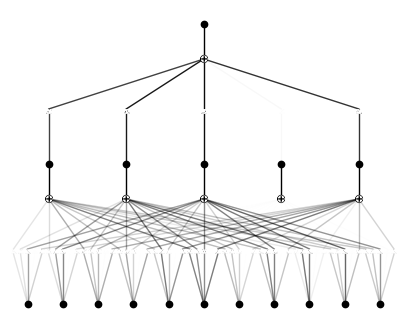

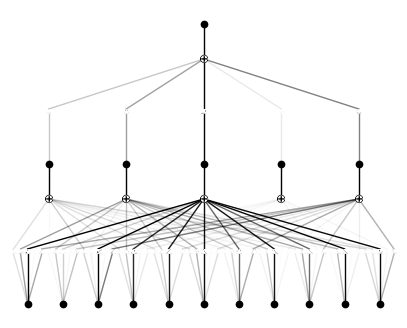

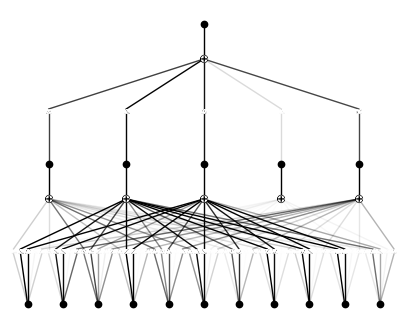

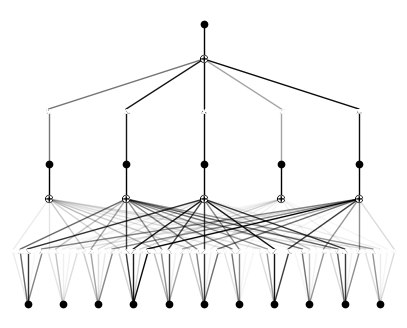

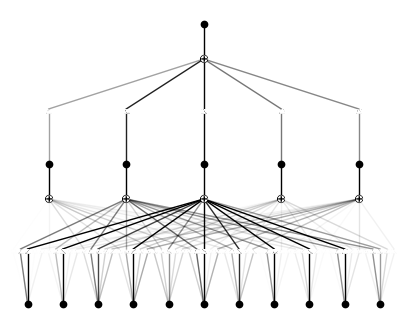

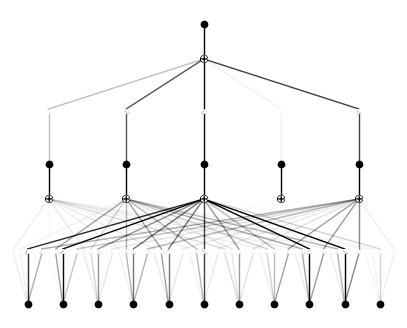

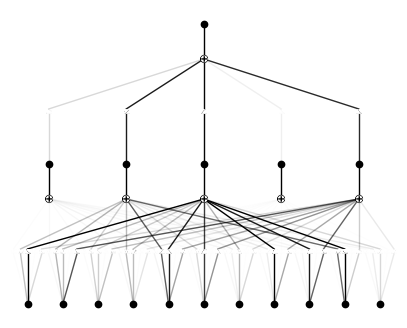

In [8]:
l_PR_ION = ['Cu', 'Ni', 'Pb', 'Al', 'Co', 'Cr', 'NO3']
input_shape = x.shape[1]

n_splits = 10


l_d_kan_params = [{'width':[input_shape,5,1], 'grid':3, 'k':3, 'device':device}] * len(l_PR_ION)
l_d_train_params = [{'tol': 1e-3, 'n_iter_no_change': 20,'opt': "LBFGS", 'steps': 200, 'lr': 1.0}] * len(l_PR_ION)
l_x = [x] * len(l_PR_ION)

l_y = []
l_y_scaler_multiplier = []
for PR_ION in l_PR_ION:
    # Choosing certain ion 
    y = df_norm[[PR_ION]].to_numpy()
    # Scaling y before train_test split in cv only because we aprior know the distribution of ions.
    scaler_y = MinMaxScaler()
    y_all_scaled = scaler_y.fit_transform(y)
    y_scaler_multiplier = scaler_y.data_max_[0] - scaler_y.data_min_[0]
    l_y_scaler_multiplier.append(y_scaler_multiplier)
    

l_y = [df_norm[[PR_ION]].to_numpy() for PR_ION in l_PR_ION]

kan_exper = kfold_experiment_es(l_x, l_y, l_d_kan_params, l_d_train_params, cv=n_splits)

In [15]:
kan_exper

(array([[ 1.72377174,  2.31521047,  1.95711506,  0.85293219,  1.76967985,
          0.60243571,  5.6225644 ],
        [ 1.45592452,  1.88902885,  1.64092158,  0.613558  ,  1.44472326,
          0.43395092,  4.4929004 ],
        [-1.00666274, -5.79516505, -3.36737554,  0.80728537, -0.95241389,
          0.9110323 ,  0.71633546]]),
 array([[0.4427673 , 0.69991143, 0.14577846, 0.08255219, 0.08707884,
         0.08159918, 0.94475497],
        [0.42742879, 0.49824075, 0.14562041, 0.058884  , 0.05930771,
         0.05738766, 0.83393287],
        [1.16104002, 5.34593183, 0.96514887, 0.03561237, 0.24831647,
         0.02258164, 0.08461181]]))

In [20]:
kan_mean_rmse, kan_std_rmse = kan_exper[0][0], kan_exper[1][0]
kan_mean_mae, kan_std_mae = kan_exper[0][1], kan_exper[1][1]
kan_mean_r2, kan_std_r2 = kan_exper[0][2], kan_exper[1][2]

Text(0.5, 1.0, 'CV KAN | ')

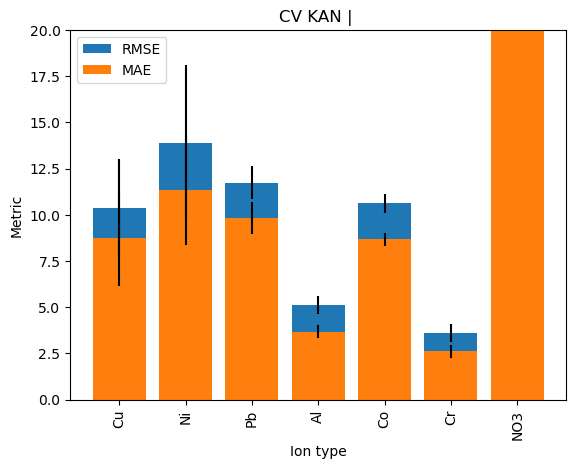

In [38]:
plt.bar(l_PR_ION, np.array(kan_mean_rmse) * np.array(l_y_scaler_multiplier), 
             yerr=np.array(kan_std_rmse) * np.array(l_y_scaler_multiplier)) # , fmt='o-'
plt.bar(l_PR_ION, np.array(kan_mean_mae) * np.array(l_y_scaler_multiplier), 
             yerr=np.array(kan_std_mae) * np.array(l_y_scaler_multiplier)) # , fmt='o-'

ax = plt.gca()
ax.set_ylim([0, 20])
#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Ion type') #'number of params'
plt.ylabel('Metric')
plt.legend(['RMSE', 'MAE'])
plt.title(f'CV KAN | ')

Text(0.5, 1.0, 'CV KAN | ')

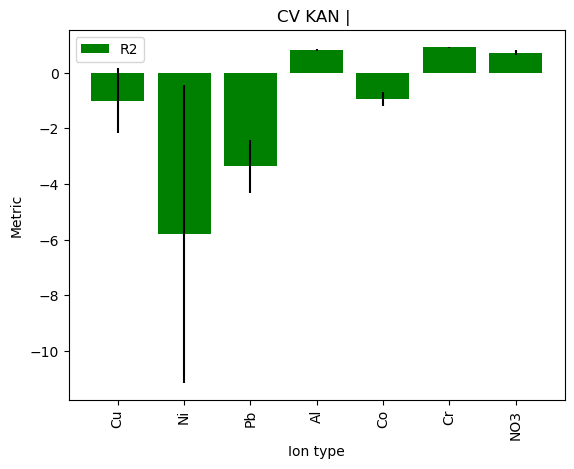

In [40]:
plt.bar(l_PR_ION, np.array(kan_mean_r2), 
             yerr=np.array(kan_std_r2), color='g') # , fmt='o-'

#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Ion type') #'number of params'
plt.ylabel('Metric')
plt.legend(['R2'])
plt.title(f'CV KAN | ')

# 9. Aggregating all metrics.

Text(0.5, 1.0, 'Comparision of MLP and CatBoost')

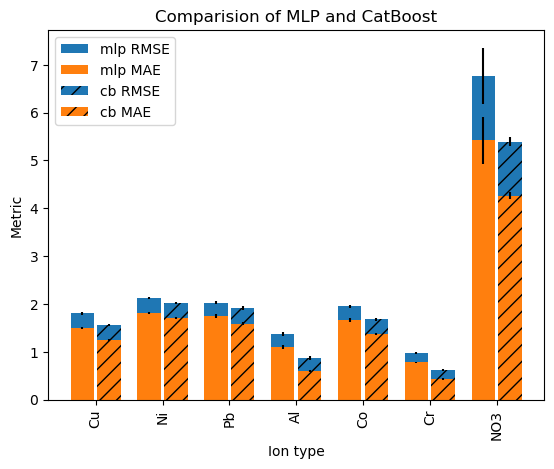

In [54]:
x_axis  = np.arange(len(l_PR_ION))
width = 0.2

plt.bar(x_axis-width, np.array(mlp_mean_rmse) * np.array(l_y_scaler_multiplier), 
             yerr=np.array(mlp_std_rmse) * np.array(l_y_scaler_multiplier),
             width=0.35, color='C0') # , fmt='o-'
plt.bar(x_axis-width, np.array(mlp_mean_mae) * np.array(l_y_scaler_multiplier), 
             yerr=np.array(mlp_std_mae) * np.array(l_y_scaler_multiplier),
             width=0.35, color='C1')  # , fmt='o-'

plt.bar(x_axis+width, np.array(cb_mean_rmse) * np.array(l_y_scaler_multiplier), 
             yerr=np.array(cb_std_rmse) * np.array(l_y_scaler_multiplier),
             width=0.35, color='C0',
             hatch='//')  # , fmt='o-'
plt.bar(x_axis+width, np.array(cb_mean_mae) * np.array(l_y_scaler_multiplier), 
             yerr=np.array(cb_std_mae) * np.array(l_y_scaler_multiplier),
             width=0.35, color='C1',
             hatch='//')  # , fmt='o-'


ax = plt.gca()
#ax.set_ylim([0, 20])
#plt.xscale('log')
#plt.yscale('log')

plt.xticks(x_axis, l_PR_ION)
plt.xticks(rotation=90)
plt.xlabel('Ion type') #'number of params'
plt.ylabel('Metric')
plt.legend(['mlp RMSE', 'mlp MAE', 'cb RMSE', 'cb MAE'])
plt.title(f'Comparision of MLP and CatBoost')

Text(0.5, 1.0, 'Comparision of MLP and CatBoost')

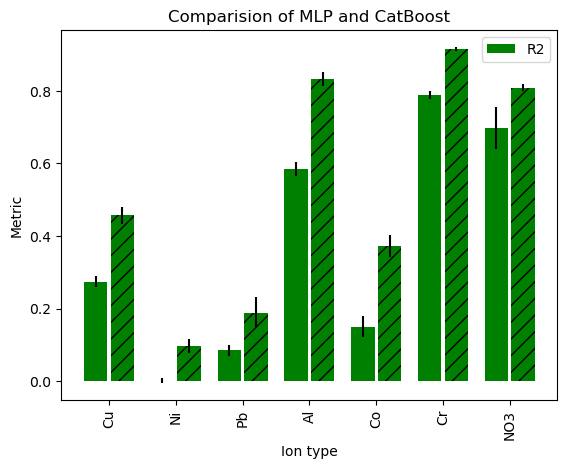

In [69]:
x_axis  = np.arange(len(l_PR_ION))
width = 0.2

plt.bar(x_axis-width, np.array(mlp_mean_r2), 
             yerr=np.array(mlp_std_r2), width=0.35, color='g') # , fmt='o-'
plt.bar(x_axis+width, np.array(cb_mean_r2), 
             yerr=np.array(cb_std_r2), color='g', width=0.35, hatch='//') # , fmt='o-'

plt.xticks(x_axis, l_PR_ION)
#plt.xscale('log')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Ion type') #'number of params'
plt.ylabel('Metric')
plt.legend(['R2'])
plt.title(f'Comparision of MLP and CatBoost')

In [64]:
dic = dict(mlp_mean_rmse = mlp_mean_rmse,
mlp_std_rmse = mlp_std_rmse,
mlp_mean_mae = mlp_mean_mae,
mlp_std_mae = mlp_std_mae,
mlp_mean_r2 = mlp_mean_r2,
mlp_std_r2 = mlp_std_r2,

cb_mean_rmse = cb_mean_rmse,
cb_std_rmse = cb_std_rmse,
cb_mean_mae = cb_mean_mae,
cb_std_mae = cb_std_mae,
cb_mean_r2 = cb_mean_r2,
cb_std_r2 = cb_std_r2,

kan_mean_rmse = kan_mean_rmse,
kan_std_rmse = kan_std_rmse,
kan_mean_mae = kan_mean_mae,
kan_std_mae = kan_std_mae,
kan_mean_r2 = kan_mean_r2,
kan_std_r2 = kan_std_r2,

l_y_scaler_multiplier = l_y_scaler_multiplier)

In [67]:
df = pd.DataFrame(dic)
df['kan_mean_rmse'] * df

,mlp_mean_rmse,mlp_std_rmse,mlp_mean_mae,mlp_std_mae,mlp_mean_r2,mlp_std_r2,cb_mean_rmse,cb_std_rmse,cb_mean_mae,cb_std_mae,cb_mean_r2,cb_std_r2,kan_mean_rmse,kan_std_rmse,kan_mean_mae,kan_std_mae,kan_mean_r2,kan_std_r2,l_y_scaler_multiplier
0,0.301194,0.004645,0.249053,0.004730,0.273331,0.015228,0.260246,0.003577,0.206631,0.003319,0.456873,0.023355,1.723772,0.442767,1.455925,0.427429,-1.006663,1.161040,6.0
1,0.353124,0.002845,0.303008,0.003602,0.001267,0.005950,0.335562,0.003450,0.285323,0.002735,0.096597,0.018838,2.315210,0.699911,1.889029,0.498241,-5.795165,5.345932,6.0
2,0.337950,0.005378,0.290361,0.006345,0.085236,0.014954,0.318175,0.006673,0.264937,0.006650,0.188663,0.042805,1.957115,0.145778,1.640922,0.145620,-3.367376,0.965149,6.0
3,0.227846,0.006913,0.184300,0.006300,0.584203,0.018595,0.143534,0.006847,0.099910,0.004940,0.834194,0.019360,0.852932,0.082552,0.613558,0.058884,0.807285,0.035612,6.0
4,0.325725,0.005144,0.277674,0.005931,0.149804,0.028665,0.279514,0.005119,0.228776,0.004431,0.373623,0.030232,1.769680,0.087079,1.444723,0.059308,-0.952414,0.248316,6.0
5,0.162450,0.003271,0.130548,0.001938,0.788478,0.011649,0.102025,0.003001,0.071822,0.002146,0.916573,0.005170,0.602436,0.081599,0.433951,0.057388,0.911032,0.022582,6.0
6,0.080585,0.007037,0.064559,0.005810,0.697568,0.058455,0.064221,0.001036,0.050790,0.000904,0.809320,0.008877,5.622564,0.944755,4.492900,0.833933,0.716335,0.084612,84.0


In [ ]:
df

In [66]:
pd.DataFrame(dic).to_csv('Multi_Exper_deep_m.csv')